# Evolutionary H-Clustering


## Imports & Common Functions

In [36]:
!pip install deap
import time, array, random, copy, math, sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, tools, creator
from deap.benchmarks.tools import hypervolume
import seaborn
import random
from tqdm.notebook import tqdm
from sklearn import datasets
import time
import math
def uniform(low, n, k):
  sol = np.random.randint(0,high = k, size = n).tolist()
  return sol
def uniform_eq(low,n,k):
  a = np.arange(k)
  initial = np.tile(a, int(np.ceil(n/k)))
  ind = initial[0:n]
  np.random.shuffle(ind)
  return ind.tolist()
def mutation(ind, k):
  index = np.random.randint(0,high = len(ind))
  ind[index] = np.random.randint(0,high = k)
  return ind,
def fitness_var(ind, k, data):
  ind_np = np.array(ind)
  sum_var = 0
  for i in range(k):
    temp = data[ind_np == i,:]
    size = temp.shape[0]
    if size != 0:
      vars = np.sum(np.var(temp, axis = 1))
      sum_var = sum_var + (vars / size)
  return sum_var,
def fitness_dist(ind, k, data):
  ind_np = np.array(ind)
  sum_dist = 0
  for i in range(k):
    temp = data[ind_np == i,:]
    size = temp.shape[0]
    if size != 0:
      centroid = np.mean(temp, axis = 0)
      dist = (temp[:,0] - centroid[0])**2 + (temp[:,1] - centroid[1])**2 + (temp[:,2] - centroid[2])**2 + (temp[:,3] - centroid[3])**2
      sum_dist = sum_dist + (np.sum(np.sqrt(dist)) / size)
  return sum_dist,
def fitness_dist_eq(ind, k, data):
  s = data.shape[0] / k
  floor = np.floor(s)
  ceil = np.ceil(s)
  ind_np = np.array(ind)
  sum_dist = 0
  violation = 0
  for i in range(k):
    temp = data[ind_np == i,:]
    size = temp.shape[0]
    if size != 0:
      if size != floor and size != ceil:
        violation += 1
      centroid = np.mean(temp, axis = 0)
      dist = (temp[:,0] - centroid[0])**2 + (temp[:,1] - centroid[1])**2 + (temp[:,2] - centroid[2])**2 + (temp[:,3] - centroid[3])**2
      sum_dist = sum_dist + (np.sum(np.sqrt(dist)) / size)
  sum_dist = sum_dist / (1 + violation)
  return sum_dist,
def favorite_child_xover(ind1, ind2):
  fit1 = ind1.fitness.values
  fit2 = ind2.fitness.values
  
  prob = fit1[0] / (fit1[0]+fit2[0])
  
  if fit1[0] > fit2[0]:
      prob = 1/prob
  
  size = min(len(ind1), len(ind2))
  
  for i in range(size):
    if random.random() > prob:
        ind1[i] = ind2[i]
        ind2[i] = ind1[i]
  return ind1, ind2


## Maximize Variance 

In [ ]:
iris = datasets.load_iris().data
n = iris.shape[0]
k = 30
pop_size = 50
ngen = 400

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", uniform, 0, n, k)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),


toolbox.register("evaluate", lambda x: fitness_var(x, k, iris))

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate",  lambda x: mutation(x, k))

toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaMuPlusLambda(pop, toolbox, 
                                     mu=pop_size,
                                     lambda_ = pop_size,
                                     cxpb=0.5, mutpb=0.5, ngen= 400,
                                     stats=stats, halloffame=hof, verbose=False)


Variance:  126.92117790867043
Distance:  15.959299422987717


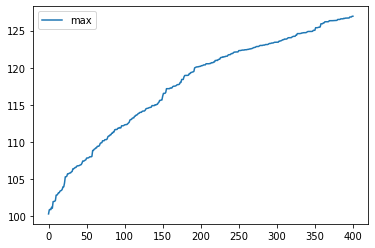

In [ ]:
var_max = hof[0]
results = pd.DataFrame(log)
print("Variance: ", fitness_var(var_max, k, iris)[0])
print("Distance: ", fitness_dist(var_max, k, iris)[0])
plt.plot(results['max'], label  = 'max')
plt.legend()

## Maximize Distance to Centroid

In [34]:
iris = datasets.load_iris().data
n = iris.shape[0]
k = 10
pop_size = 50

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", uniform, 0, n, k)
# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),


toolbox.register("evaluate", lambda x: fitness_dist(x, k, iris))

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate",  lambda x: mutation(x, k))

toolbox.register("select", tools.selTournament, tournsize=3)

t0 = time.time()
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
population, log = algorithms.eaMuPlusLambda(pop, toolbox, 
                                     mu=pop_size,
                                     lambda_ = pop_size,
                                     cxpb=0.5, mutpb=0.5, ngen= 400,
                                     stats=stats, halloffame=hof, verbose=False)
t1 = time.time()
print("Elapsed Time: ", t1-t0)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Elapsed Time:  22.704975843429565


Variance:  36.410323378164556
Distance:  26.196198585856127


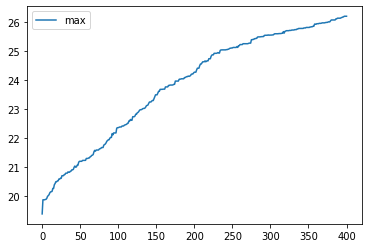

In [35]:
dist_max = hof[0]
results = pd.DataFrame(log)
print("Variance: ", fitness_var(dist_max, k, iris)[0])
print("Distance: ", fitness_dist(dist_max, k, iris)[0])
plt.plot(results['max'], label  = 'max')
plt.legend()

## Maxi. Dist. w/ Equal Clusters


In [ ]:
iris = datasets.load_iris().data
n = iris.shape[0]
k = 10
pop_size = 100

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", uniform_eq, 0, n, k)
# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),


toolbox.register("evaluate", lambda x: fitness_dist_eq(x, k, iris))

toolbox.register("mate", favorite_child_xover)

toolbox.register("mutate",  lambda x: mutation(x, k))

toolbox.register("select", tools.selTournament, tournsize=3)

t0 = time.time()
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
population, log = algorithms.eaMuPlusLambda(pop, toolbox, 
                                     mu=pop_size,
                                     lambda_ = pop_size,
                                     cxpb=0.3, mutpb=0.7, ngen= 1000,
                                     stats=stats, halloffame=hof, verbose=False)
t1 = time.time()
print("Elapsed Time: ", t1-t0)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Elapsed Time:  87.53370976448059


Variance:  32.902541666666664
Distance:  19.38779938859954


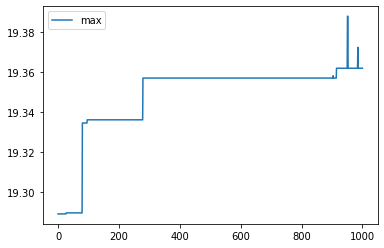

In [ ]:
equi_dist_max = hof[0]
results = pd.DataFrame(log)
print("Variance: ", fitness_var(equi_dist_max, k, iris)[0])
print("Distance: ", fitness_dist(equi_dist_max, k, iris)[0])
plt.plot(results['max'], label  = 'max')
plt.legend()

In [ ]:
unique, counts = np.unique(np.array(equi_dist_max), return_counts=True)
print("Dist_max")
print(np.asarray((unique, counts)))


Dist_max
[[ 0  1  2  3  4  5  6  7  8  9]
 [15 15 15 15 15 15 15 15 15 15]]


## Comparison 

In [ ]:
unique, counts = np.unique(np.array(var_max), return_counts=True)
print("Var_max")
print(np.asarray((unique, counts)))
unique, counts = np.unique(np.array(dist_max), return_counts=True)
print("Dist_max")
print(np.asarray((unique, counts)))

Var_max
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [14 23  1  1 20  1 13  1  1  1  1  2  1  8 13  2 14  1  1  1  1  1  1  1
   1  9  1  1  1 13]]
Dist_max
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 7  4  2  4  4  2  2  2  4 15  4  2  2  2 22  2  2  4  2  5  2  2  2  7
   2  4  2  4  2 30]]


## Evolutionary Normal Clustering
Minimize distance from centroid

In [39]:
iris = datasets.load_iris().data
n = iris.shape[0]
k = 10
pop_size = 50

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", uniform, 0, n, k)
# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),


toolbox.register("evaluate", lambda x: fitness_dist(x, k, iris))

toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate",  lambda x: mutation(x, k))

toolbox.register("select", tools.selTournament, tournsize=3)
t0 = time.time()
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaMuPlusLambda(pop, toolbox, 
                                     mu=pop_size,
                                     lambda_ = pop_size,
                                     cxpb=0.5, mutpb=0.5, ngen= 400,
                                     stats=stats, halloffame=hof, verbose=False)
t1 = time.time()
print(t1 - t0)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


15.003676652908325


Variance:  32.04189965364997
Distance:  3.892166295946611


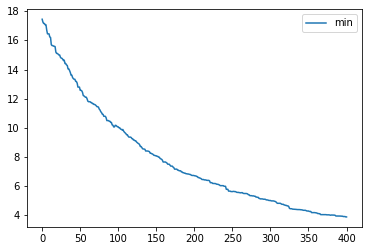

In [40]:
dist_min = hof[0]
results = pd.DataFrame(log)
print("Variance: ", fitness_var(dist_min, k, iris)[0])
print("Distance: ", fitness_dist(dist_min, k, iris)[0])
plt.plot(results['min'], label  = 'min')
plt.legend()

In [ ]:
unique, counts = np.unique(np.array(dist_min), return_counts=True)
print("Var_max")
print(np.asarray((unique, counts)))

Var_max
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29]
 [ 4 19  1 13 11  7  1  6  8  1 13  4  1  1  1  3  1  1  1  5  1 13  7  5
   1 11  1  7  1  1]]
